### The data sets are from Kaggle competition: https://www.kaggle.com/c/digit-recognizer/data?select=test.csv

In [1]:
import pandas as pd
import numpy as np

train = np.asarray(pd.read_csv('train.csv'))
test = np.asarray(pd.read_csv('test.csv'))

In [2]:
# Convert X to 28 x 28 and y to a vector
X_train = train[:, 1:].reshape(-1, 28, 28)
y_train = train[:,0].reshape(-1,)
X_test = test.reshape(-1, 28, 28)

<Figure size 432x288 with 0 Axes>

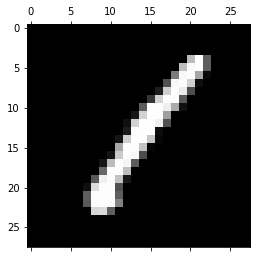

In [3]:
# Show an image example
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()
plt.matshow(X_train[0])

In [4]:
# Split the data sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.03)

In [5]:
# One-hot encode y_train and y_test
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10).astype(int)
y_val = to_categorical(y_val, 10).astype(int)

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam

input_shape = (X_train.shape[1], )
# Create the keras tuner model.
def build_model(learning_rate = 0.01, activation = tf.nn.leaky_relu):
    model = Sequential()
    model.add(Dense(16, activation=tf.nn.leaky_relu))
    model.add(BatchNormalization())
    model.add(Dense(32, activation=tf.nn.leaky_relu))
    model.add(Dense(64, activation=tf.nn.leaky_relu))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    opt = Adam(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
# simple early stopping
es = EarlyStopping(monitor='val_accuracy', verbose=1, patience=50)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy',verbose=0, save_best_only=True)
model = build_model()
# fit model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=4000, verbose=1, callbacks=[es, mc])
# load the saved model
saved_model = load_model('best_model.h5', custom_objects={'leaky_relu': tf.nn.leaky_relu})
# evaluate the model
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(X_val, y_val, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Epoch 1/4000
1274/1274 [==============================] - 5s 3ms/step - loss: 0.3773 - accuracy: 0.8846 - val_loss: 0.2722 - val_accuracy: 0.9159
Epoch 2/4000
1274/1274 [==============================] - 3s 2ms/step - loss: 0.1887 - accuracy: 0.9439 - val_loss: 0.2443 - val_accuracy: 0.9365
Epoch 3/4000
1274/1274 [==============================] - 3s 2ms/step - loss: 0.1803 - accuracy: 0.9482 - val_loss: 0.2095 - val_accuracy: 0.9476
Epoch 4/4000
1274/1274 [==============================] - 3s 2ms/step - loss: 0.1810 - accuracy: 0.9468 - val_loss: 0.1818 - val_accuracy: 0.9516
Epoch 5/4000
1274/1274 [==============================] - 3s 2ms/step - loss: 0.1721 - accuracy: 0.9496 - val_loss: 0.1871 - val_accuracy: 0.9540
Epoch 6/4000
1274/1274 [==============================] - 3s 2ms/step - loss: 0.1651 - accuracy: 0.9521 - val_loss: 0.1937 - val_accuracy: 0.9468
Epoch 7/4000
1274/1274 [==============================] - 3s 2ms/step - loss: 0.1624 - accuracy: 0.9512 - val_loss: 0.2184 -

In [ ]:
# Predict target vector
y_pred = saved_model.predict(X_test)
# Return the column of max probabilities
y_pred = np.argmax(y_pred, axis=1)
y_pred = pd.DataFrame(y_pred, columns=['Label'])
y_pred.index += 1
y_pred.index.name='ImageId'
y_pred.to_csv('prediction.csv', index=True)

In [ ]:
# import os
# os.system("shutdown /s")